In [3]:
# !pip install selenium

   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.7 MB 730.2 kB/s eta 0:00:13
   -- ------------------------------------- 0.5/9.7 MB 730.2 kB/s eta 0:00:13
   --- ------------------------------------ 0.8/9.7 MB 799.2 kB/s eta 0:00:12
   ---- ----------------------------------- 1.0/9.7 MB 838.4 kB/s eta 0:00:11
   ----- ---------------------------------- 1.3/9.7 MB 882.6 kB/s eta 0:00:10
   ----- ---------------------------------- 1.3/9.7 MB 882.6 kB/s eta 0:00:10
   ------ --------------------------------- 1.6/9.7 MB 856.1 kB/s eta 0:00:10
   ------- -------------------------------- 1.8/9.7 MB 853.0 kB/s eta 0:00:10
   ------- --------------------

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup
import time
import os
import requests

In [9]:
# Опции для Chrome
options = webdriver.ChromeOptions()
options.add_argument("--ignore-certificate-errors")
options.add_argument("--allow-insecure-localhost")

driver = webdriver.Chrome(options=options)

In [11]:
driver.get("https://www.riatomsk.ru/novosti?ysclid=m4soh1xrgn394751649") 

In [47]:
# options = webdriver.ChromeOptions()
# options.add_argument("--ignore-certificate-errors")
# options.add_argument("--allow-insecure-localhost")

# driver = webdriver.Chrome(options=options)

# try:
    # Переход на сайт
# driver.get("https://www.riatomsk.ru/novosti?ysclid=m4soh1xrgn394751649") 

#     # Прокликивание кнопки "Далее" n-раз
#     # for _ in range(600):
#     #     try:
#     #         button = WebDriverWait(driver, 10).until(
#     #             EC.element_to_be_clickable((By.CLASS_NAME, "nextLink"))
#     #         )
#     #         button.click()
#     #         time.sleep(2)  # время ожидания 2 секунды
#     #     except Exception as e:
#     #         print(f"Ошибка при нажатии кнопки: {e}")
#     #         continue

c=0 #просто счетчик, чтобы было видно, на какой итерации мы находимся
for i in range(40): #я поставил навскиду количество раз, сколько надо нажать кнопку "показать больше" (как оказалось, это даже слишком перебор, но как говорится лучше пере, чем недо)
    try: #берем трай с эксепшном на случай, если вдруг кнопка пропадет и мы дойдем до самого низа страницы (спойлер: этого не случится, но лучше перебдеть, вдруг мы захотим на за год новости, а за все время вообще)
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") #опускаемся в самый низ страницы. Вообще работает и без этого, но я это добавил, чтобы было в окошке браузера видно, где мы находимся, чтобы вручную не листать
        time.sleep(5) #немножко ждёмс, чтобы все прогрузилось как следует
        btn = driver.find_element(By.CLASS_NAME, "nextLink") #находим кнопку "показать больше" по названию класса
        btn.click() #нажимаем кнопочку
        c+=1 # меняем счетчик, чтобы было видно, на какой мы итерации
        print(c)
    except NoSuchElementException: #на случай если кнопочка пропадет, мы прерываем цикл и выходим без ошибок
        continue
        
    # Получение ссылок на новости
    # time.sleep(2)  # Дополнительная пауза для полной загрузки страницы
# soup = BeautifulSoup(driver.page_source, "html.parser")
# news_links = []

# # Поиск всех новостей на странице
# articles = soup.find_all("a", class_="rubNewItem")

# if articles:
#     for article in articles:
#         link = article.get("href")  # Получаем атрибут 'href' напрямую
#         if link:  # Проверяем, что ссылка существует
#             if not link.startswith("http"):
#                 link = "https://www.riatomsk.ru" + link
#             news_links.append(link)
#             print(f"Собрана ссылка: {link}")
# else:
#     print("Не удалось найти статьи на странице.")

    # # Запись ссылок в файл
    # if news_links:
    #     try:
    #         with open("news_links.txt", "w", encoding="utf-8") as file:
    #             for link in news_links:
                    
    #                 file.write(link + "\n")
    #         print("Ссылки на новости успешно записаны в news_links.txt.")
    #     except Exception as e:
    #         print(f"Ошибка при записи в файл: {e}")
    # else:
    #     print("Ссылки не были найдены для записи.")

# except Exception as e:
#     print(f"Произошла ошибка: {e}")


# finally:
#     driver.quit()  # Закрытие браузера

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


In [49]:
soup = BeautifulSoup(driver.page_source, "html.parser")
news_links = []

# Поиск всех новостей на странице
articles = soup.find_all("a", class_="rubNewItem")

if articles:
    for article in articles:
        link = article.get("href")  # Получаем атрибут 'href' напрямую
        if link:  # Проверяем, что ссылка существует
            if not link.startswith("http"):
                link = "https://www.riatomsk.ru" + link
            news_links.append(link)
            print(f"Собрана ссылка: {link}")
else:
    print("Не удалось найти статьи на странице.")

Собрана ссылка: https://www.riatomsk.ru/article/20241218/kak-grabitelj-napal-na-tomskogo-pochtaljona-operativnoe-video-umvd/
Собрана ссылка: https://www.riatomsk.ru/article/20241218/novaya-laboratoriya-po-upravleniyu-tehprocessami-otkrilasj-v-tpu/
Собрана ссылка: https://www.riatomsk.ru/article/20241218/podozrevaemij-v-napadeniyah-na-zhenschin-pochtaljonov-tomich-zaklyuchen-v-sizo/
Собрана ссылка: https://www.riatomsk.ru/article/20241218/parapark-zhk-sibelektromotor-tomsk/
Собрана ссылка: https://www.riatomsk.ru/article/20241218/levchugov-arefjev-sud-yurga/
Собрана ссылка: https://www.riatomsk.ru/article/20241218/mer-kedrovogo-izmenenie-statusa-okruga-nikak-ne-kosnetsya-zhitelej/
Собрана ссылка: https://www.riatomsk.ru/article/20241218/74400/
Собрана ссылка: https://www.riatomsk.ru/article/20241218/pochti-3-tisyachi-tomichej-posetili-yarmarki-vakansij-v-2024-godu/
Собрана ссылка: https://www.riatomsk.ru/article/20241218/vosjmiletnij-maljchik-postradal-tomsk/
Собрана ссылка: https://www

In [85]:
len(news_links)

5380

In [97]:
type(news_links[7][32:36]) == str

True

In [109]:
news_links[235][32:36].isalpha()

True

In [153]:
with open("news_links.txt", "r", encoding="utf-8") as file:
    news_links = file.readlines()


In [173]:
len(news_links)

5380

In [185]:
news_links[554][32:]

'tomsk_mtk_construction\n'

In [187]:
# Запись ссылок в файл

links_2024 = []
i = 0
# if news_links:
    # try:
    #     with open("news_links1.txt", "w", encoding="utf-8") as file:
for link in news_links:
    # year = int(link[32:36])
    if link[32:36].isalpha() == True:
        if link[32:] != 'tomsk_mtk_construction\n':
            links_2024.append(link)
    elif link[32:36] == 'U-NO':
        links_2024.append(link)
    elif int(link[32:36]) > 2023:
        links_2024.append(link)
    print(i)
    i += 1
    
    

#     print("Ссылки на новости успешно записаны в news_links!.txt.")
#     except Exception as e:
#         print(f"Ошибка при записи в файл: {e}")
# else:
#     print("Ссылки не были найдены для записи.")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [189]:
len(links_2024)

5241

In [191]:
with open("news_links1.txt", "w", encoding="utf-8") as file:
    for link in links_2024:
        file.write(link)

In [1]:
with open("news_links1.txt", "r", encoding="utf-8") as file:
    links = file.readlines()

In [163]:
links[5240]

'https://www.riatomsk.ru/article/20240101/pogoda-tomsk/\n'

In [3]:
import requests as req
import re #регулярные выражения
import pandas as pd
from datetime import datetime
from bs4 import BeautifulSoup #парсер

In [7]:
info = [] 
i = 0

In [165]:
i = 0

In [167]:
# Копирование информации из ссылки по заголовкам
for link in links[5240:]:
    print(link)
    link = link.strip()
    if str(req.get(links[i])) != '<Response [404]>':
        i = i + 1
        response = req.get(link)
        soup1 = BeautifulSoup(response.text, 'html.parser')

        # extracted_text = ''.join([j.text for j in soup1.find("div", class_="statAbout")])
        # text = re.sub('^([^.]\D+[^.]+\.\s)', "", extracted_text)
        # text = str(text.split('\n')[1:])

        text = (
                        soup1.find("div", class_="statAbout").text.strip()
                        if soup1.find("div", class_="statAbout")
                        else "Нет текста новости"
                    )

        # date = soup1.find("span", id_ = "ctl00_InfoPlaceHolder_DateLabel")   #.text  
        # date = date[:16].split(' ')[0]
        # time = soup1.find("span", id_ = "ctl00_InfoPlaceHolder_TimeLabel")   #.text
        # time = time[0:5]
        # date = ' '.join(date)  font-size: 16px; margin-top: 10px;
        date = soup1.find("div", style= "font-size: 16px; margin-top: 10px;").text
        # time, date = date[:5].split(' ')[0], date[:20].split(' ')[1]
        time, date = date[:5], date[5:40]


        # article_tags = soup1.find("div", class_="info")
        # tags = [tag.text for tag in article_tags.find_all("a", class_="tag")] if article_tags else []

    #     title_div = soup1.find("div", class_="article__title")
        title_h1 = soup1.find("div", class_="statInfoName")

        # if title_h1:
        title = title_h1.text.strip()
        # lead = soup1.find("h1", class_="article__second-title").text.strip() if soup1.find("h1", class_="article__second-title") else ""
        print(link, title, text, time, date, sep = "\n")
        info.append({"url": link, "title": title, "text": text, "time": time, "date": date})
    else:
        info.append({"url": link, "title": None, "text": None, "time": None, "date": None})
    
        i = i + 1


https://www.riatomsk.ru/article/20240101/pogoda-tomsk/

https://www.riatomsk.ru/article/20240101/pogoda-tomsk/
Снег и сильный ветер ожидаются в Томске в первый день января
ТОМСК, 1 янв – РИА Томск. Температура воздуха до минус 11 градусов, небольшой снег и юго-западный ветер с порывами до 16 метров в секунду ожидаются в Томске в понедельник днем, сообщается на сайте регионального гидрометцентра.По данным синоптиков, утром 1 января в Томске температура будет колебаться от минус 15 до минус 13 градусов. Затем потеплеет."В Томске облачно с прояснениями. Небольшой снег. Температура днем – минус 9-11 градусов", – сообщает гидрометцентр.В районах области прогнозируется от минус 9 до минус 14 градусов, на севере региона минус 18-23 градусов. Ветер в Томске и в области ожидается юго-западный, его скорость составит 5-10 метров в секунду, возможны порывы до 16 метров в секунду.
7:17 

1 января 2024 г.


In [151]:
i

5241

In [169]:
len(info)

5236

In [47]:
import pandas as pd

In [171]:
news = pd.DataFrame(info)

In [173]:
len(news)

5236

In [179]:
len(set(news.url))

5236

In [175]:
news.to_csv(r'news_2024.csv', index= False )

In [21]:
info[281:285]

[{'url': 'https://www.riatomsk.ru/article/20241201/pogoda-tomsk/',
  'title': 'Небольшой мороз и снег ожидаются в Томске в первый день декабря',
  'text': 'ТОМСК, 1 дек – РИА Томск.\xa0Синоптики\xa0в воскресенье днем в Томске прогнозируют небольшой снег и до 9 градусов мороза, сообщается на сайте регионального гидрометцентра."По Томску (в воскресенье) облачная погода с прояснениями.., нем небольшой снег… Температура днем – минус 7-9 градусов", – следует из прогноза.По области также ожидается небольшой\xa0снег, в отдельных районах возможна изморозь. Температура воздуха прогнозируется в пределах минус 4-9 градусов, местами – до 14 градусов мороза.Ветер, по данным синоптиков, и в Томске, и по области юго-восточный с переходом на юго-западный 2-7 метров в секунду, в районах области возможны порывы 12 метров в секунду. На дорогах региона местами ожидается гололедица.',
  'time': '7:15\xa0',
  'date': '\r\n1 декабря 2024 г.'},
 {'url': 'https://www.riatomsk.ru/article/20241130/sovkombank-usk

In [138]:
import pandas as pd
df = pd.DataFrame(info)

In [140]:
print(str(df['text'][1]))

ТОМСК, 27 ноя – РИА Томск. Четырехлетний мальчик погиб, выпав из окна многоэтажки на улице Энтузиастов в Томске; возбуждено уголовное дело, прокуратура проводит проверку, сообщила в среду пресс-служба регионального ведомства.Уточняется, что трагедия произошла вечером во вторник, 26 ноября. "Из окна квартиры, расположенной на восьмом этаже многоквартирного жилого дома по улице Энтузиастов в городе Томске, выпал четырехлетний мальчик. От полученных телесных повреждений ребенок скончался", – говорится в сообщении.Прокуратура Октябрьского района Томска проводит проверку. Кроме того, в связи с гибелью ребенка было возбуждено уголовное дело по части первой статьи "Причинение смерти по неосторожности".


In [142]:
# Запись скопированного датафрейма в файл
df.to_csv(r'RIA_articles_2024.csv', index= False )

## Preprocessing

In [3]:
import nltk
import pandas as pd

In [69]:
df = pd.read_csv(r"news_2024.csv", encoding='UTF-8')

In [15]:
df.url[5232]

'https://www.riatomsk.ru/article/20240101/sonnoe-carstvo-kak-viglyadel-tomsk-rannim-utrom-1-yanvarya/'

In [75]:
df.duplicated(subset=['text'], keep=False).sum()

164

In [73]:
len(set(df.text))

5073

In [77]:
df.drop_duplicates(subset='text', inplace=True)

In [79]:
df.head(35)

url  \
0   https://www.riatomsk.ru/article/20241218/kak-g...   
1   https://www.riatomsk.ru/article/20241218/novay...   
2   https://www.riatomsk.ru/article/20241218/podoz...   
3   https://www.riatomsk.ru/article/20241218/parap...   
4   https://www.riatomsk.ru/article/20241218/levch...   
5   https://www.riatomsk.ru/article/20241218/mer-k...   
6     https://www.riatomsk.ru/article/20241218/74400/   
7   https://www.riatomsk.ru/article/20241218/pocht...   
8   https://www.riatomsk.ru/article/20241218/vosjm...   
9   https://www.riatomsk.ru/article/20241218/stude...   
10  https://www.riatomsk.ru/article/20241218/tomic...   
11  https://www.riatomsk.ru/article/20241218/zhilj...   
12  https://www.riatomsk.ru/article/20241218/bpla-...   
13    https://www.riatomsk.ru/article/20241218/74393/   
14  https://www.riatomsk.ru/article/20241218/chto-...   
15  https://www.riatomsk.ru/article/20241218/lasch...   
16  https://www.riatomsk.ru/article/20241218/pogod...   
17  https://www.riatomsk.ru/article/20241217/avtob...   
18  https://www.riatomsk.ru/article/20241217/mazur...   
19  https://www.riatomsk.ru/article/20241217/tomic...   
20  https://www.riatomsk.ru/article/20241217/dva-t...   
21    https://www.riatomsk.ru/article/20241217/74385/   
22  https://www.riatomsk.ru/article/20241217/skomo...   
23  https://www.riatomsk.ru/article/20241217/sovko...   
24  https://www.riatomsk.ru/article/20241217/udale...   
25  https://www.riatomsk.ru/article/20241217/tomsk...   
26  https://www.riatomsk.ru/article/20241217/gosdo...   
27  https://www.riatomsk.ru/article/20241217/vakan...   
28  https://www.riatomsk.ru/article/20241217/dom-z...   
29  https://www.riatomsk.ru/article/20241217/imusc...   
30  https://www.riatomsk.ru/article/20241217/bolee...   
31  https://www.riatomsk.ru/article/20241217/avtob...   
33  https://www.riatomsk.ru/article/20241217/tomsk...   
34  https://www.riatomsk.ru/article/20241217/pogod...   
35  https://www.riatomsk.ru/article/20241216/tgu-o...   

                                                title  \
0   Как грабитель напал на томского почтальона: оп...   
1   Новая лаборатория по управлению техпроцессами ...   
2   Подозреваемый в нападениях на женщин-почтальон...   
3   "Томскводоканал" вложит 228 млн руб в подведен...   
4   Прокурор просит 15 лет "строгача" для томского...   
5   Мэр Кедрового: изменение статуса округа никак ...   
6   Ольга Хрипунова стала главой томского облдепар...   
7   Около 3 тысяч томичей посетили ярмарки ваканси...   
8   Восьмилетний мальчик попал под колеса Skoda на...   
9   Резидент СБИ ТУСУРа из Намибии победил в "Стар...   
10  Томичи первыми в РФ оценили качество голосовых...   
11  Власти Томска в 2024 году почти вдвое ускорили...   
12  Мазур: Томская область готова обучать оператор...   
13  Новый светодиодный фонтан "Зимний сад" украсил...   
14  Что нельзя делать в День зимнего солнцестояния...   
15  СибГМУ отметит юбилей ученого, одевшего мир в ...   
16  Среда в Томске будет умеренно морозной и без о...   
17  Автобус №4 изменит схему движения в Томске из-...   
18  Мазур: инвестиции в Томскую область в 2024г ра...   
19  Томичам запретили приносить фейерверки на Ново...   
20  Два троллейбуса "Адмирал" прибыли в Томск, на ...   
21  Томский кадровый центр мотивирует зуммеров к т...   
22  Томский "Скоморох" покажет ряд премьер после в...   
23  Совкомбанк запустил акцию "Новогодний бум с Ха...   
24  Число вакансий с удаленкой за год в Томской об...   
25  Томская область ждет в 2025г дотацию 10,8 млрд...   
26  Госдолг Томской области в 2025г может увеличит...   
27  Почти 6 тысяч вакансий в регионе подходят томи...   
28  Рабочие сносят "дом за рубль" на Кузнецова, 33...   
29  Томичи недоплатили около 140 млн руб имуществе...   
30  Более 250 голштинских нетелей приехали на томс...   
31  Новые автобусы "НЕФАЗ" 14 раз попадали в ДТП в...   
33  На машине в столицу студентов: 10 причин попас...   
34   Около 10 градусов мороза ждет томичей во вторник   
35

In [81]:
df1 = df.iloc[1:]

In [83]:
len(df1)

5072

In [87]:
df1.to_csv(r'RIA_withoutnone_2024.csv', index= False )

In [141]:
df1 = pd.read_csv(r"RIA_withoutnone_2024.csv", encoding='UTF-8')

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5072 entries, 0 to 5071
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     5072 non-null   object
 1   title   5072 non-null   object
 2   text    5072 non-null   object
 3   time    5072 non-null   object
 4   date    5072 non-null   object
dtypes: object(5)
memory usage: 198.3+ KB


In [143]:
df1['prep']=df1['text']

In [145]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [147]:
# Импорт стоп-слов + функция, которая удаляет их
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('russian'))
def stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
# Применим функцию удаления стоп-слов
# df["text_stop"] = df["text_punct"].apply(stopwords)
print(STOPWORDS)

{'этом', 'чуть', 'между', 'более', 'ни', 'разве', 'раз', 'за', 'из', 'после', 'может', 'всех', 'хоть', 'лучше', 'чтоб', 'она', 'куда', 'они', 'вдруг', 'были', 'во', 'только', 'да', 'сам', 'нас', 'тут', 'где', 'теперь', 'ну', 'быть', 'была', 'уже', 'нибудь', 'них', 'чего', 'не', 'этой', 'его', 'почти', 'и', 'так', 'конечно', 'потом', 'нее', 'им', 'то', 'какой', 'как', 'даже', 'до', 'или', 'здесь', 'этот', 'в', 'тебя', 'тоже', 'вы', 'ведь', 'надо', 'эти', 'же', 'всего', 'ее', 'об', 'от', 'мы', 'никогда', 'бы', 'но', 'о', 'сейчас', 'ли', 'без', 'тот', 'мне', 'вас', 'над', 'наконец', 'про', 'для', 'при', 'нет', 'будто', 'если', 'том', 'ж', 'свою', 'тогда', 'к', 'три', 'их', 'есть', 'еще', 'тем', 'что', 'чтобы', 'а', 'ты', 'по', 'совсем', 'было', 'моя', 'вам', 'у', 'был', 'много', 'больше', 'того', 'с', 'нельзя', 'вот', 'себя', 'какая', 'меня', 'иногда', 'эту', 'он', 'ему', 'другой', 'всегда', 'ней', 'кто', 'на', 'со', 'можно', 'ничего', 'чем', 'перед', 'когда', 'опять', 'через', 'такой', '

In [15]:
df1

url  \
0     https://www.riatomsk.ru/article/20241218/novay...   
1     https://www.riatomsk.ru/article/20241218/podoz...   
2     https://www.riatomsk.ru/article/20241218/parap...   
3     https://www.riatomsk.ru/article/20241218/levch...   
4     https://www.riatomsk.ru/article/20241218/mer-k...   
...                                                 ...   
5067  https://www.riatomsk.ru/article/20240101/snego...   
5068  https://www.riatomsk.ru/article/20240101/kak-b...   
5069  https://www.riatomsk.ru/article/20240101/ozhid...   
5070  https://www.riatomsk.ru/article/20240101/chto-...   
5071  https://www.riatomsk.ru/article/20240101/pogod...   

                                                  title  \
0     Новая лаборатория по управлению техпроцессами ...   
1     Подозреваемый в нападениях на женщин-почтальон...   
2     "Томскводоканал" вложит 228 млн руб в подведен...   
3     Прокурор просит 15 лет "строгача" для томского...   
4     Мэр Кедрового: изменение статуса округа никак ...   
...                                                 ...   
5067  Спасатели предупреждают томичей о сильном ветр...   
5068  Как будут работать торговые центры Томска в но...   
5069  Юбилей, новая маршрутная сеть и меньше мусора:...   
5070  Пенсии и новый возраст призывников: что измени...   
5071  Снег и сильный ветер ожидаются в Томске в перв...   

                                                   text   time  \
0     ТОМСК, 18 дек – РИА Томск. Томский политехниче...  19:15   
1     ТОМСК, 18 дек – РИА Томск. Томская полиция рас...  18:54   
2     ТОМСК,\r\n18 дек – РИА Томск. "Томскводоканал"...  18:07   
3     ТОМСК,\r\n18 дек – РИА Томск. Прокурор запроси...  17:17   
4     ТОМСК,\r\n18 дек – РИА Томск. Изменение статус...  15:04   
...                                                 ...    ...   
5067  ТОМСК, 1 янв – РИА Томск. Сильный снег и ветер...  14:44   
5068  ТОМСК, 1 янв\r\n– РИА Томск. Торговые центры Т...  12:33   
5069  ТОМСК, 1 янв – РИА Томск. Первый день нового г...  11:43   
5070  ТОМСК, 1 янв – РИА Томск. Увеличение пенсий и ...  10:03   
5071  ТОМСК, 1 янв – РИА Томск. Температура воздуха ...  7:17    

                         date  \
0      \r\n18 декабря 2024 г.   
1      \r\n18 декабря 2024 г.   
2      \r\n18 декабря 2024 г.   
3      \r\n18 декабря 2024 г.   
4      \r\n18 декабря 2024 г.   
...                       ...   
5067     \r\n1 января 2024 г.   
5068     \r\n1 января 2024 г.   
5069     \r\n1 января 2024 г.   
5070     \r\n1 января 2024 г.   
5071     \r\n1 января 2024 г.   

                                                   prep  
0     ТОМСК, 18 дек – РИА Томск. Томский политехниче...  
1     ТОМСК, 18 дек – РИА Томск. Томская полиция рас...  
2     ТОМСК,\r\n18 дек – РИА Томск. "Томскводоканал"...  
3     ТОМСК,\r\n18 дек – РИА Томск. Прокурор запроси...  
4     ТОМСК,\r\n18 дек – РИА Томск. Изменение статус...  
...                                                 ...  
5067  ТОМСК, 1 янв – РИА Томск. Сильный снег и ветер...  
5068  ТОМСК, 1 янв\r\n– РИА Томск. Торговые центры Т...  
5069  ТОМСК, 1 янв – РИА Томск. Первый день нового г...  
5070  ТОМСК, 1 янв – РИА Томск. Увеличение пенсий и ...  
5071  ТОМСК, 1 янв – РИА Томск. Температура воздуха ...  

[5072 rows x 6 columns]

In [149]:
# Все в нижний регистр, удаление стоп-слов
# i=0
# for article in df['prep']:
#     # df.loc[i]  = df.loc[i].str.lower().replace('[^\w\s\d+\t\r]','').apply(stopwords)
#     df.prep[i]  = df.prep[i].str.lower().replace('[^\w\s\d+\t\r]','').apply(stopwords)
#     i+=1
# print(df['prep'].head())


df1['prep'] = (
    df1['prep']
    .str.lower()  # В нижний регистр
    .str.replace(r'[^\w\s]', ' ', regex=True)  # Удаляем все символы, кроме букв и пробелов
    .apply(stopwords)  # Удаляем стоп-слова
)

# Вывод первых строк
print(df1['prep'].head())

0    томск 18 дек риа томск томский политехнический...
1    томск 18 дек риа томск томская полиция расслед...
2    томск 18 дек риа томск томскводоканал подведет...
3    томск 18 дек риа томск прокурор запросил 15 ле...
4    томск 18 дек риа томск изменение статуса город...
Name: prep, dtype: object


In [151]:
df1.prep[1]

'томск 18 дек риа томск томская полиция расследует уголовных дела нападениях женщин почтальонов хищении общей сложности около 860 тысяч рублей эпизодов имел место 2020 году второй 2024 м подозреваемый 50 летний житель поселка зональная станция задержан ранее судим совершение тяжких преступлений сообщает среду пресс служба умвд ранее сообщалось июне 2020 года неизвестный напал женщину почтальона дома улице федора лыткина 24 томске мужчина забрал пострадавшей сумку деньгами скрылся велосипеде уточняет пресс служба умвд злоумышленник нанес жертве несколько ударов деревянным предметом распылил лицо перцовый баллончик похищено 260 тысяч рублей предназначавшихся пенсионерам городе томске начале прошлой недели дежурную часть отдела мвд россии кировскому району позвонила женщина почтальон которая сообщила подъезде одного домов улице мокрушина напал незнакомец мужчина вырвал рук сумку предназначенными выплаты пенсий денежными средствами сумме порядка 600 тысяч рублей скрылся говорится сообщении

In [81]:
# !pip install pymystem3

In [153]:
import pymystem3
from pymystem3 import Mystem as mystem

In [157]:
len(df1['prep'])

5072

In [27]:
# def lemat(text):
#     result = ''.join(m.lemmatize(text))
#     return result

In [35]:
(df1.loc[:50, ('prep')])

0     томск 18 дек риа томск томский политехнический...
1     томск 18 дек риа томск томская полиция расслед...
2     томск 18 дек риа томск томскводоканал подведет...
3     томск 18 дек риа томск прокурор запросил 15 ле...
4     томск 18 дек риа томск изменение статуса город...
5     томск 18 дек риа томск губернатор томской обла...
6     томск 18 дек риа томск около трех тысяч челове...
7     томск 18 дек риа томск skoda сбила восьмилетне...
8     томск 18 дек риа томск 60 проектов прошло аксе...
9     томск 18 дек риа томск российский оператор моб...
10    томск 18 дек риа томск власти томска начала 20...
11    томск 18 дек риа томск томских вуза способны 2...
12    томск 18 дек риа томск монтаж новых светодиодн...
13    самый короткий световой день 2024 году выпадае...
14    томск 18 дек риа томск конференция посвященная...
15    томск 18 дек риа томск температура воздуха мин...
16    томск 17 дек риа томск маршрут автобуса 4 томс...
17    томск 17 дек риа томск инвестиции томскую 

In [203]:
# m = mystem()
''.join(m.lemmatize(df1.loc[1001, ('prep')]))

'томск 12 окт риа томск заселение новый корпус дом интернат престарелый инвалид село итаток томский район возможный приведение объект соответствие противопожарный норма планироваться подопечный начинать жить корпус май июнь 2025 год сообщать риа томск ответ запрос начальник облдепартамент архитектура строительство дмитрий ассонов ранее сообщаться строительство два новый корпус дом интернат итатка начинаться 2019 год нацпроект демография строительство 529 8 миллион рубль завершать конец 2021 го год корпус пустовать заселение возможно ввод эксплуатация очистной сооружение строительство должный завершать конец 2023 год корректировка проектный сметный документация псд потребоваться выполнение строительный монтажный работа связывать приведение соответствие объект действующий противопожарный норма заселение новый корпус интернат планироваться май июнь 2025 год связь проведение строительный монтажный работа необходимо определять подрядчик проводить строительный монтажный работа объект говорит

In [269]:
# Лемматизация
# df_prep = df1['prep']

# df1['lem'] = df1['prep']
# m = mystem()
# i = 0
for articles in df1.loc[4001:, ('lem')]:
    # df['lemmas'][i] = ''.join(m.lemmatize(articles))
    df1.loc[i, ('lem')] = ''.join(m.lemmatize(articles))
    print(df1.loc[i, ('lem')])
    i += 1
# df1['lem'] = df1['prep']
# df1['lem'] = df1['prep'].apply(lemat)

# Вывод первых строк
# print(df1['lem'].head())



томск 19 мара риа томск свыше 900 многоквартирный дом томск признавать аварийный 1 январь 2024 год расселять необходимо 21 тысяча человек сообщать вторник председатель комитет жилищный политика горадминистрация татьяна боровский заседание градостроительный комитет гордума ранее сообщаться томский область рамка нацпроект действовать программа расселение аварийный жилье конец 2023 год регион обязанный переселять 4 тысяча человек итог переезжать мало 1 тысяча каргасокский томский район томск завершать этап госпрограмма запланировать 2021 2022 год 2023 год регион вернуть госбюджет 1 3 миллиард рубль предназначать расселение состояние 1 январь текущий год областной центр 905 многоквартирный дом общий площадь 335 тысяча квадратный метр признавать аварийный подлежать снос реконструкция 21 тысяча гражданин нуждаться расселение этап 2024 год рамка национальный проект мы необходимо текущий год расселять 35 тысяча квадратный метр рассказывать боровский уточнять реализация программа город необходи

In [271]:
df1.loc[5071, ('lem')] 

'томск 1 янва риа томск температура воздух минус 11 градус небольшой снег юго западный ветер порыв 16 метр секунда ожидаться томск понедельник день сообщаться сайт региональный гидрометцентр данные синоптик утро 1 январь томск температура колебаться минус 15 минус 13 градус затем потеплеть томск облачно прояснение небольшой снег температура день минус 9 11 градус сообщать гидрометцентр район область прогнозироваться минус 9 минус 14 градус север регион минус 18 23 градус ветер томск область ожидаться юго западный скорость составлять 5 10 метр секунда возможный порыв 16 метр секунда\n'

In [273]:
i

5072

In [99]:
df1.duplicated(subset='lem').sum()

0

In [275]:
df1.to_csv(r"2024_withlemmatization.csv")

In [277]:
word_list = {"мара", "апр", "май", "июн", "июла", "авг", "окт", "сент", "ноя", "ной", "дека", "фев", "янва", "сено", "томск", "томский", "томич", "томичи", "томичка", "голубев", "масляева", "соколов", "мазуров", "мазур", "прошкина", "планкина", "матвиевский", "риа", "томск", "агентство", "миллион", "год", "сообщаться", "ранее", "сообщалось", "сообщать", "скр", "прокуратура", "администрация", "мэрия", "мэрии", "департамент", "пресс-службы", "пресс-служб", "пресс-служба", "область", "журналист", "корреспондент", "сообщать", "это", "который", "рубль", "также", "сообщать", "отмечается", "день", "весь", "томск", "регион", "тысяча", "свой", "россия", "бюджет", "вопрос", "рассказывать", "время", "комитет", "проводить", "добавлять", "около", "рф", "уточнять", "слово", "настоящий", "должный", "место", "вторник", "павел", "понедельник", "региональный", "вячеслав", "сайт", "пятница", "решение", "редакция", "полиция", "город", "улица", "месяц", "из-за", "мочь", "январь", "февраль", "март", "апрель", "май", "июнь", "июль", "август", "сентябрь", "октябрь", "ноябрь", "декабрь", "янв", "фев", "мар", "апр", "май", "июн", "июл", "авг", "сен", "окт", "ноя", "дектябрь", "апр", "мар", "май", "июн", "июл", "авг", "сен", "окт", "ноя", "фев", "янв", "дек", "риа", "погода", "понедельник", "вторник", "среда", "четверг", "пятница", "суббота", "воскресенье", "декабрь", "январь", "февраль", "март", "апрель", "май", "июнь", "июль", "август", "сентябрь", "октябрь", "ноябрь", "прояснение", "погода", "тепло", "регион", "нуль", "гроза", "возможный", "осадки", "небольшой", "гидрометцентр", "синоптик", "воздух", "региональный", "дождь", "снег", "порыв", "минус", "плюс", "ожидаться", "ветер", "секунда", "температура", "место", "метр", "день", "градус"}

In [279]:
# Новый список стоп-слов + функция их удаления
# STOPWORDS = set(stopwords.words('russian'))
STOPWORDS_1 = STOPWORDS.union(word_list)
def stopwords_1(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS_1])
# Применим функцию удаления стоп-слов
# df["text_stop"] = df["text_punct"].apply(stopwords)
print(STOPWORDS_1)

{'этом', 'чуть', 'между', 'июль', 'более', 'ни', 'разве', 'плюс', 'ноябрь', 'раз', 'за', 'из', 'после', 'может', 'область', 'всех', 'хоть', 'гроза', 'температура', 'миллион', 'томичи', 'лучше', 'матвиевский', 'чтоб', 'она', 'куда', 'пятница', 'полиция', 'четверг', 'планкина', 'ранее', 'они', 'время', 'вдруг', 'были', 'во', 'скр', 'комитет', 'только', 'да', 'снег', 'сам', 'сено', 'градус', 'нас', 'настоящий', 'тут', 'где', 'пресс-служб', 'вопрос', 'июнь', 'теперь', 'корреспондент', 'воздух', 'ну', 'быть', 'была', 'дека', 'уже', 'мара', 'региональный', 'из-за', 'год', 'который', 'нибудь', 'них', 'апрель', 'также', 'рф', 'чего', 'июн', 'прошкина', 'должный', 'вторник', 'не', 'сентябрь', 'томич', 'авг', 'этой', 'улица', 'его', 'почти', 'и', 'так', 'конечно', 'мар', 'дектябрь', 'потом', 'нее', 'им', 'то', 'ветер', 'какой', 'янв', 'как', 'даже', 'до', 'или', 'прояснение', 'здесь', 'администрация', 'риа', 'май', 'этот', 'дек', 'в', 'томичка', 'прокуратура', 'тебя', 'свой', 'журналист', 'тоже'

In [283]:
df1

url  \
0     https://www.riatomsk.ru/article/20241218/novay...   
1     https://www.riatomsk.ru/article/20241218/podoz...   
2     https://www.riatomsk.ru/article/20241218/parap...   
3     https://www.riatomsk.ru/article/20241218/levch...   
4     https://www.riatomsk.ru/article/20241218/mer-k...   
...                                                 ...   
5067  https://www.riatomsk.ru/article/20240101/snego...   
5068  https://www.riatomsk.ru/article/20240101/kak-b...   
5069  https://www.riatomsk.ru/article/20240101/ozhid...   
5070  https://www.riatomsk.ru/article/20240101/chto-...   
5071  https://www.riatomsk.ru/article/20240101/pogod...   

                                                  title  \
0     Новая лаборатория по управлению техпроцессами ...   
1     Подозреваемый в нападениях на женщин-почтальон...   
2     "Томскводоканал" вложит 228 млн руб в подведен...   
3     Прокурор просит 15 лет "строгача" для томского...   
4     Мэр Кедрового: изменение статуса округа никак ...   
...                                                 ...   
5067  Спасатели предупреждают томичей о сильном ветр...   
5068  Как будут работать торговые центры Томска в но...   
5069  Юбилей, новая маршрутная сеть и меньше мусора:...   
5070  Пенсии и новый возраст призывников: что измени...   
5071  Снег и сильный ветер ожидаются в Томске в перв...   

                                                   text   time  \
0     ТОМСК, 18 дек – РИА Томск. Томский политехниче...  19:15   
1     ТОМСК, 18 дек – РИА Томск. Томская полиция рас...  18:54   
2     ТОМСК,\r\n18 дек – РИА Томск. "Томскводоканал"...  18:07   
3     ТОМСК,\r\n18 дек – РИА Томск. Прокурор запроси...  17:17   
4     ТОМСК,\r\n18 дек – РИА Томск. Изменение статус...  15:04   
...                                                 ...    ...   
5067  ТОМСК, 1 янв – РИА Томск. Сильный снег и ветер...  14:44   
5068  ТОМСК, 1 янв\r\n– РИА Томск. Торговые центры Т...  12:33   
5069  ТОМСК, 1 янв – РИА Томск. Первый день нового г...  11:43   
5070  ТОМСК, 1 янв – РИА Томск. Увеличение пенсий и ...  10:03   
5071  ТОМСК, 1 янв – РИА Томск. Температура воздуха ...  7:17    

                         date  \
0      \r\n18 декабря 2024 г.   
1      \r\n18 декабря 2024 г.   
2      \r\n18 декабря 2024 г.   
3      \r\n18 декабря 2024 г.   
4      \r\n18 декабря 2024 г.   
...                       ...   
5067     \r\n1 января 2024 г.   
5068     \r\n1 января 2024 г.   
5069     \r\n1 января 2024 г.   
5070     \r\n1 января 2024 г.   
5071     \r\n1 января 2024 г.   

                                                   prep  \
0     томск 18 дек риа томск томский политехнический...   
1     томск 18 дек риа томск томская полиция расслед...   
2     томск 18 дек риа томск томскводоканал подведет...   
3     томск 18 дек риа томск прокурор запросил 15 ле...   
4     томск 18 дек риа томск изменение статуса город...   
...                                                 ...   
5067  томск 1 янв риа томск сильный снег ветер порыв...   
5068  томск 1 янв риа томск торговые центры томска н...   
5069  томск 1 янв риа томск первый день нового года ...   
5070  томск 1 янв риа томск увеличение пенсий пособи...   
5071  томск 1 янв риа томск температура воздуха мину...   

                                                    lem  
0     томск 18 дека риа томск томский политехнически...  
1     томск 18 дека риа томск томский полиция рассле...  
2     томск 18 дека риа томск томскводоканал подводи...  
3     томск 18 дека риа томск прокурор запрашивать 1...  
4     томск 18 дека риа томск изменение статус город...  
...                                                 ...  
5067  томск 1 янва риа томск сильный снег ветер поры...  
5068  томск 1 янва риа томск торговый центр томск но...  
5069  томск 1 янва риа томск первый день новый год к...  
5070  томск 1 янва риа томск увеличение пенсия пособ...  
5071  томск 1 янва риа томск температура воздух мину...  

[5072 rows x 7 columns]

In [1]:
import re

In [291]:
# Удаление всех небуквенных символов
df1['let'] = df1['lem']
h = 0
for lists in df1['let']:   
    # for word in lists:
    #     if word == 'r':
    df1.loc[h, ('let')] = re.sub(r'[^\w\s\r]+|[\d]+', ' ', lists).replace('\n', ' ')
    # df_tf.loc[h, ('let')] = re.sub(r'[0-9]+', '', lists)
    h += 1
# df1['let'] = df1['lem']
# df1['let'] = re.sub(r'[^\w\s\r]+|[\d]+', '', df1['lem']).apply(stopwords_1)
df1['let']

0       томск   дека риа томск томский политехнический...
1       томск   дека риа томск томский полиция расслед...
2       томск   дека риа томск томскводоканал подводит...
3       томск   дека риа томск прокурор запрашивать   ...
4       томск   дека риа томск изменение статус город ...
                              ...                        
5067    томск   янва риа томск сильный снег ветер поры...
5068    томск   янва риа томск торговый центр томск но...
5069    томск   янва риа томск первый день новый год к...
5070    томск   янва риа томск увеличение пенсия пособ...
5071    томск   янва риа томск температура воздух мину...
Name: let, Length: 5072, dtype: object

In [137]:
lists

'томск 1 янва риа томск температура воздух минус 11 градус небольшой снег югозападный ветер порыв 16 метр секунда ожидаться томск понедельник день сообщаться сайт региональный гидрометцентрапо данные синоптик утро 1 январь томск температура колебаться минус 15 минус 13 градус затем потеплеетва томск облачно прояснение небольшой снег температура день минус 911 градус сообщать гидрометцентрв район область прогнозироваться минус 9 минус 14 градус север регион минус 1823 градус ветер томск область ожидаться югозападный скорость составлять 510 метр секунда возможный порыв 16 метр секунда\n'

In [293]:
df1.loc[1, 'let']

'томск   дека риа томск томский полиция расследовать уголовный дело нападение женщина почтальон хищение общий сложность около   тысяча рубль эпизод иметь место   год второй   м подозреваемый   летний житель поселок зональный станция задерживать ранее судить совершение тяжкий преступление сообщать среда пресс служба умвд ранее сообщаться июнь   год неизвестный нападывать женщина почтальон дом улица федор лыткин   томск мужчина забирать пострадать сумка деньги скрываться велосипед уточнять пресс служба умвд злоумышленник наносить жертва несколько удар деревянный предмет распылять лицо перцовый баллончик похищать   тысяча рубль предназначаться пенсионер город томск начало прошлый неделя дежурный часть отдел мвд россия кировский район позвонить женщина почтальон который сообщать подъезд один дом улица мокрушина нападывать незнакомец мужчина вырывать рука сумка предназначать выплата пенсия денежный средство сумма порядок   тысяча рубль скрываться говориться сообщение отмечаться полицейский 

In [295]:
df1

url  \
0     https://www.riatomsk.ru/article/20241218/novay...   
1     https://www.riatomsk.ru/article/20241218/podoz...   
2     https://www.riatomsk.ru/article/20241218/parap...   
3     https://www.riatomsk.ru/article/20241218/levch...   
4     https://www.riatomsk.ru/article/20241218/mer-k...   
...                                                 ...   
5067  https://www.riatomsk.ru/article/20240101/snego...   
5068  https://www.riatomsk.ru/article/20240101/kak-b...   
5069  https://www.riatomsk.ru/article/20240101/ozhid...   
5070  https://www.riatomsk.ru/article/20240101/chto-...   
5071  https://www.riatomsk.ru/article/20240101/pogod...   

                                                  title  \
0     Новая лаборатория по управлению техпроцессами ...   
1     Подозреваемый в нападениях на женщин-почтальон...   
2     "Томскводоканал" вложит 228 млн руб в подведен...   
3     Прокурор просит 15 лет "строгача" для томского...   
4     Мэр Кедрового: изменение статуса округа никак ...   
...                                                 ...   
5067  Спасатели предупреждают томичей о сильном ветр...   
5068  Как будут работать торговые центры Томска в но...   
5069  Юбилей, новая маршрутная сеть и меньше мусора:...   
5070  Пенсии и новый возраст призывников: что измени...   
5071  Снег и сильный ветер ожидаются в Томске в перв...   

                                                   text   time  \
0     ТОМСК, 18 дек – РИА Томск. Томский политехниче...  19:15   
1     ТОМСК, 18 дек – РИА Томск. Томская полиция рас...  18:54   
2     ТОМСК,\r\n18 дек – РИА Томск. "Томскводоканал"...  18:07   
3     ТОМСК,\r\n18 дек – РИА Томск. Прокурор запроси...  17:17   
4     ТОМСК,\r\n18 дек – РИА Томск. Изменение статус...  15:04   
...                                                 ...    ...   
5067  ТОМСК, 1 янв – РИА Томск. Сильный снег и ветер...  14:44   
5068  ТОМСК, 1 янв\r\n– РИА Томск. Торговые центры Т...  12:33   
5069  ТОМСК, 1 янв – РИА Томск. Первый день нового г...  11:43   
5070  ТОМСК, 1 янв – РИА Томск. Увеличение пенсий и ...  10:03   
5071  ТОМСК, 1 янв – РИА Томск. Температура воздуха ...  7:17    

                         date  \
0      \r\n18 декабря 2024 г.   
1      \r\n18 декабря 2024 г.   
2      \r\n18 декабря 2024 г.   
3      \r\n18 декабря 2024 г.   
4      \r\n18 декабря 2024 г.   
...                       ...   
5067     \r\n1 января 2024 г.   
5068     \r\n1 января 2024 г.   
5069     \r\n1 января 2024 г.   
5070     \r\n1 января 2024 г.   
5071     \r\n1 января 2024 г.   

                                                   prep  \
0     томск 18 дек риа томск томский политехнический...   
1     томск 18 дек риа томск томская полиция расслед...   
2     томск 18 дек риа томск томскводоканал подведет...   
3     томск 18 дек риа томск прокурор запросил 15 ле...   
4     томск 18 дек риа томск изменение статуса город...   
...                                                 ...   
5067  томск 1 янв риа томск сильный снег ветер порыв...   
5068  томск 1 янв риа томск торговые центры томска н...   
5069  томск 1 янв риа томск первый день нового года ...   
5070  томск 1 янв риа томск увеличение пенсий пособи...   
5071  томск 1 янв риа томск температура воздуха мину...   

                                                    lem  \
0     томск 18 дека риа томск томский политехнически...   
1     томск 18 дека риа томск томский полиция рассле...   
2     томск 18 дека риа томск томскводоканал подводи...   
3     томск 18 дека риа томск прокурор запрашивать 1...   
4     томск 18 дека риа томск изменение статус город...   
...                                                 ...   
5067  томск 1 янва риа томск сильный снег ветер поры...   
5068  томск 1 янва риа томск торговый центр томск но...   
5069  томск 1 янва риа томск первый день новый год к...   
5070  томск 1 янва риа томск увеличение пенсия пособ...   
5071  томск 1 янва риа томск температура воздух мину...   

                          

In [297]:
df1.to_csv(r'RIA_articles_2024_preprocessing.csv', index= False )

## Токенизация

In [299]:
df_tf = pd.read_csv(r"RIA_articles_2024_preprocessing.csv", encoding='UTF-8')

In [301]:
df_tf

url  \
0     https://www.riatomsk.ru/article/20241218/novay...   
1     https://www.riatomsk.ru/article/20241218/podoz...   
2     https://www.riatomsk.ru/article/20241218/parap...   
3     https://www.riatomsk.ru/article/20241218/levch...   
4     https://www.riatomsk.ru/article/20241218/mer-k...   
...                                                 ...   
5067  https://www.riatomsk.ru/article/20240101/snego...   
5068  https://www.riatomsk.ru/article/20240101/kak-b...   
5069  https://www.riatomsk.ru/article/20240101/ozhid...   
5070  https://www.riatomsk.ru/article/20240101/chto-...   
5071  https://www.riatomsk.ru/article/20240101/pogod...   

                                                  title  \
0     Новая лаборатория по управлению техпроцессами ...   
1     Подозреваемый в нападениях на женщин-почтальон...   
2     "Томскводоканал" вложит 228 млн руб в подведен...   
3     Прокурор просит 15 лет "строгача" для томского...   
4     Мэр Кедрового: изменение статуса округа никак ...   
...                                                 ...   
5067  Спасатели предупреждают томичей о сильном ветр...   
5068  Как будут работать торговые центры Томска в но...   
5069  Юбилей, новая маршрутная сеть и меньше мусора:...   
5070  Пенсии и новый возраст призывников: что измени...   
5071  Снег и сильный ветер ожидаются в Томске в перв...   

                                                   text   time  \
0     ТОМСК, 18 дек – РИА Томск. Томский политехниче...  19:15   
1     ТОМСК, 18 дек – РИА Томск. Томская полиция рас...  18:54   
2     ТОМСК,\r\n18 дек – РИА Томск. "Томскводоканал"...  18:07   
3     ТОМСК,\r\n18 дек – РИА Томск. Прокурор запроси...  17:17   
4     ТОМСК,\r\n18 дек – РИА Томск. Изменение статус...  15:04   
...                                                 ...    ...   
5067  ТОМСК, 1 янв – РИА Томск. Сильный снег и ветер...  14:44   
5068  ТОМСК, 1 янв\r\n– РИА Томск. Торговые центры Т...  12:33   
5069  ТОМСК, 1 янв – РИА Томск. Первый день нового г...  11:43   
5070  ТОМСК, 1 янв – РИА Томск. Увеличение пенсий и ...  10:03   
5071  ТОМСК, 1 янв – РИА Томск. Температура воздуха ...  7:17    

                         date  \
0      \r\n18 декабря 2024 г.   
1      \r\n18 декабря 2024 г.   
2      \r\n18 декабря 2024 г.   
3      \r\n18 декабря 2024 г.   
4      \r\n18 декабря 2024 г.   
...                       ...   
5067     \r\n1 января 2024 г.   
5068     \r\n1 января 2024 г.   
5069     \r\n1 января 2024 г.   
5070     \r\n1 января 2024 г.   
5071     \r\n1 января 2024 г.   

                                                   prep  \
0     томск 18 дек риа томск томский политехнический...   
1     томск 18 дек риа томск томская полиция расслед...   
2     томск 18 дек риа томск томскводоканал подведет...   
3     томск 18 дек риа томск прокурор запросил 15 ле...   
4     томск 18 дек риа томск изменение статуса город...   
...                                                 ...   
5067  томск 1 янв риа томск сильный снег ветер порыв...   
5068  томск 1 янв риа томск торговые центры томска н...   
5069  томск 1 янв риа томск первый день нового года ...   
5070  томск 1 янв риа томск увеличение пенсий пособи...   
5071  томск 1 янв риа томск температура воздуха мину...   

                                                    lem  \
0     томск 18 дека риа томск томский политехнически...   
1     томск 18 дека риа томск томский полиция рассле...   
2     томск 18 дека риа томск томскводоканал подводи...   
3     томск 18 дека риа томск прокурор запрашивать 1...   
4     томск 18 дека риа томск изменение статус город...   
...                                                 ...   
5067  томск 1 янва риа томск сильный снег ветер поры...   
5068  томск 1 янва риа томск торговый центр томск но...   
5069  томск 1 янва риа томск первый день новый год к...   
5070  томск 1 янва риа томск увеличение пенсия пособ...   
5071  томск 1 янва риа томск температура воздух мину...   

                          

In [9]:
from nltk.tokenize import RegexpTokenizer

In [303]:
# Токенизация - нужно для разбиения строки по пробелам на список слов
all_texts = []
# df['text_prep'] = df['stop_num']
tokenizer = RegexpTokenizer(r'\w+')

i = 0
for texts in df_tf['let']:
    df_tf.let[i] = tokenizer.tokenize(str(texts))
    all_texts.extend(df_tf.let[i])
    i += 1
all_texts   

C:\Users\User\AppData\Local\Temp\ipykernel_12880\1637391066.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_tf.let[i] = tokenizer.tokenize(str(texts))


['томск',
 'дека',
 'риа',
 'томск',
 'томский',
 'политехнический',
 'университет',
 'тпу',
 'открывать',
 'второй',
 'лаборатория',
 'цифровой',
 'система',
 'управление',
 'технологический',
 'процесс',
 'производство',
 'совместно',
 'компания',
 'атомик',
 'софт',
 'занятие',
 'начинаться',
 'сентябрь',
 'год',
 'сообщать',
 'пресс',
 'служба',
 'вуз',
 'среда',
 'ранее',
 'сообщаться',
 'тпу',
 'производитель',
 'атомик',
 'софт',
 'заключать',
 'соглашение',
 'сотрудничество',
 'первый',
 'лаборатория',
 'распределенный',
 'автоматизированный',
 'система',
 'управление',
 'технологический',
 'процесс',
 'поддержка',
 'компания',
 'открывать',
 'университет',
 'июнь',
 'год',
 'томский',
 'политехнический',
 'университет',
 'поддержка',
 'российский',
 'разработчик',
 'атомик',
 'софт',
 'открываться',
 'лаборатория',
 'цифровой',
 'система',
 'управление',
 'технологический',
 'процесс',
 'второй',
 'ред',
 'студент',
 'быть',
 'изучать',
 'современный',
 'система',
 'управление

In [241]:
df_tf

prep
0   [томск, ной, риа, томск, тысяча, новый, бизнес...
1   [томск, ной, риа, томск, четырехлетний, мальчи...
2   [томск, ной, риа, томск, строительство, админи...
3   [томск, ной, риа, томск, дарья, фадеев, волонт...
4   [томск, ной, риа, томск, выпускник, томский, г...
5   [томск, ной, риа, томск, доля, житель, томский...
6   [томск, ной, риа, томск, бывший, мэр, томск, и...
7   [томск, ной, риа, томск, около, тысяча, новоро...
8   [томск, ной, риа, томск, температура, воздух, ...
9   [томск, ной, риа, томск, инвестор, завершать, ...
10  [томск, ной, риа, томск, ветеринар, томск, нин...
11  [томск, ной, риа, томск, российский, фонд, кру...
12  [томск, ной, риа, томск, преподаватель, инстит...
13  [томск, ной, риа, томск, октябрьский, районный...
14  [томск, ной, риа, томск, томич, мочь, воспольз...
15  [томск, ной, риа, томск, томский, прокуратура,...
16  [томск, ной, риа, томск, наплавной, мост, зара...
17  [томск, ной, риа, томск, дополнительный, инстр...
18  [томск, ной, риа, томск, томский, национальный...
19  [томск, ной, риа, томск, памятник, писатель, в...
20  [томск, ной, риа, томск, легкий, мороз, около,...
21  [томск, ной, риа, томск, трое, мужчина, возрас...
22  [томск, ной, риа, томск, гемодиализный, центр,...
23  [томск, ной, риа, томск, директор, спортивный,...
24  [томск, ной, риа, томск, медик, десять, месяц,...
25  [томск, ной, риа, томск, свыше, ребенок, регио...
26  [томск, ной, риа, томск, представитель, itкомп...
27  [томск, ной, риа, томск, монтаж, новогодний, е...
28  [томск, ной, риа, томск, дарья, фадеев, интера...
29  [томск, ной, риа, томск, томич, благотворитель...
30  [томск, ной, риа, томск, дорожный, рабочий, об...
31  [томск, ной, риа, томск, председатель, томский...
32  [томск, ной, риа, томск, изменение, налоговый,...
33  [томск, ной, риа, томск, компания, домсервиско...
34  [томск, ной, риа, томск, областной, департамен...
35  [томск, ной, риа, томск, томский, национальный...
36  [томск, ной, риа, томск, температура, воздух, ...
37  [томск, ной, риа, томск, анастасия, залозный, ...
38  [томск, ной, риа, томск, число, жалоба, томич,...
39  [томск, ной, риа, томск, легковой, автомобиль,...
40  [томск, ной, риа, томск, томский, благотворите...
41  [томск, ной, риа, томск, автомобиль, kia, сове...
42  [томск, ной, риа, томск, алиса, монголин, стре...
43  [томск, ной, риа, томск, бульдозер, автогрейде...
44  [мама, весь, россия, отмечать, воскресение, св...
45  [томск, ной, риа, томск, температура, воздух, ...
46  [томск, ной, риа, томск, прокуратура, ленински...
47  [томск, ной, риа, томск, лидия, кузьменко, под...
48  [томск, ной, риа, томск, губернатор, томский, ...
49  [томск, ной, риа, томск, томский, национальный...
50  [томск, ной, риа, томск, томский, суд, освобож...
51  [томск, ной, риа, томск, частично, расселять, ...
52  [томск, ной, риа, томск, рыжий, сосновый, пили...
53  [томск, ной, риа, томск, томскводоканал, плани...
54  [томск, ной, риа, томск, температура, воздух, ...
55  [томск, ной, риа, томск, реализация, томский, ...
56  [томск, ной, риа, томск, проект, томский, кадр...
57  [томск, ной, риа, томск, двадцать, лось, косул...
58  [томск, ной, риа, томск, томский, инвестиционн...
59  [томск, ной, риа, томск, участник, артшкола, о...

## Plots

In [305]:
# Удаление из списка слов, которые вошли в стоп-слова
# %%time

# add_stopwords = ['nan', 'r']
all_texts_1 = [token.strip() for token in all_texts if token not in STOPWORDS_1]
add_stopwords = ['nan', 'r', 'ной']
all_texts_2 = [token.strip() for token in all_texts_1 if token not in add_stopwords]

In [307]:
# Подсчет вхождений слов
# %%time
from nltk.probability import FreqDist
fdist = FreqDist(all_texts_2)
fdist

FreqDist({'работа': 3937, 'служба': 3801, 'пресс': 3570, 'человек': 3311, 'проект': 3190, 'район': 3010, 'сообщение': 2870, 'новый': 2822, 'дом': 2443, 'компания': 2436, ...})

In [347]:
fdist.most_common(5)

[('работа', 3937),
 ('служба', 3801),
 ('пресс', 3570),
 ('человек', 3311),
 ('проект', 3190)]

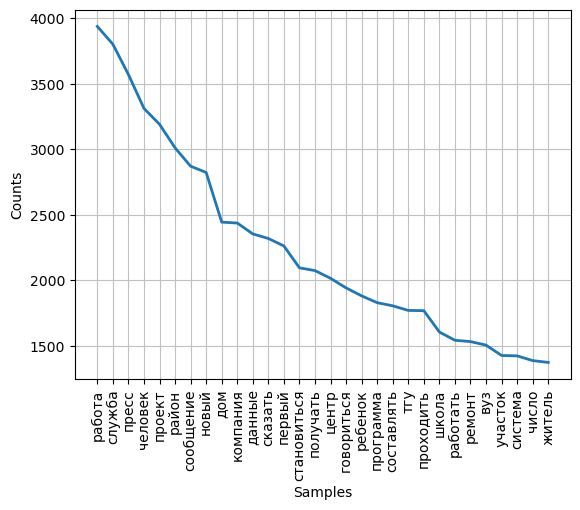

TypeError: _AxesBase.draw() missing 1 required positional argument: 'renderer'

In [355]:
fdist.plot(30,cumulative=False)
plt.show()

In [179]:
# !pip install wordcloud

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [319]:
text_raw = " ".join(all_texts_2)

In [321]:
# wordcloud = WordCloud().generate(text_raw)
wordcloud = WordCloud(background_color='white', width=1400, height=1000).generate(text_raw)

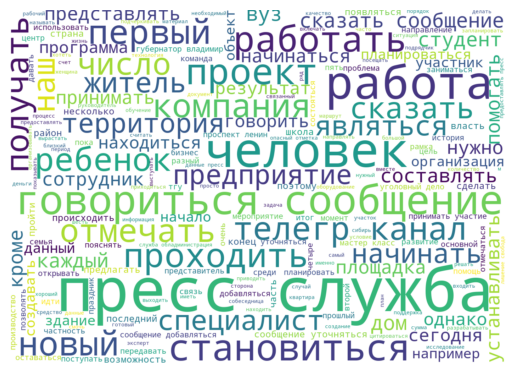

In [323]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## TF-IDF

In [77]:
# !pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [325]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True)

In [327]:
# Контрольное удаление стоп-слов + преобразование списков обратно в строки
i = 0
add_stopwords = ['nan', 'r', 'ной', 'наш', 'очень', 'просто']
for lists in df_tf['let']:
    lst = [token.strip() for token in lists if token not in STOPWORDS_1]
    lst_2 = [token.strip() for token in lst if token not in add_stopwords]
    df_tf.let[i] = ' '.join(lst_2)
    i += 1
print(df_tf.let)    

C:\Users\User\AppData\Local\Temp\ipykernel_12880\1568692233.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_tf.let[i] = ' '.join(lst_2)


0       политехнический университет тпу открывать втор...
1       расследовать уголовный дело нападение женщина ...
2       томскводоканал подводить коммуникация новый жк...
3       прокурор запрашивать колония строгий режим биз...
4       изменение статус кедровый городской муниципаль...
                              ...                        
5067    сильный объявлять оперативный предупреждение т...
5068    торговый центр новогодний работать особый праз...
5069    первый новый кажется хороший думать будущее ме...
5070    увеличение пенсия пособие рост цена сигарета п...
5071    юго западный данные утро колебаться затем поте...
Name: let, Length: 5072, dtype: object


In [329]:
df_tf['let'].to_csv('RIA_prep.csv', index=False)

In [331]:
df_tf['let']

0       политехнический университет тпу открывать втор...
1       расследовать уголовный дело нападение женщина ...
2       томскводоканал подводить коммуникация новый жк...
3       прокурор запрашивать колония строгий режим биз...
4       изменение статус кедровый городской муниципаль...
                              ...                        
5067    сильный объявлять оперативный предупреждение т...
5068    торговый центр новогодний работать особый праз...
5069    первый новый кажется хороший думать будущее ме...
5070    увеличение пенсия пособие рост цена сигарета п...
5071    юго западный данные утро колебаться затем поте...
Name: let, Length: 5072, dtype: object

In [333]:
texts = df_tf.let

In [335]:
texts

0       политехнический университет тпу открывать втор...
1       расследовать уголовный дело нападение женщина ...
2       томскводоканал подводить коммуникация новый жк...
3       прокурор запрашивать колония строгий режим биз...
4       изменение статус кедровый городской муниципаль...
                              ...                        
5067    сильный объявлять оперативный предупреждение т...
5068    торговый центр новогодний работать особый праз...
5069    первый новый кажется хороший думать будущее ме...
5070    увеличение пенсия пособие рост цена сигарета п...
5071    юго западный данные утро колебаться затем поте...
Name: let, Length: 5072, dtype: object

In [337]:
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(texts)

In [339]:
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0]

In [341]:
# Вычисление TF-IDF
df1 = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["tfidf"])
df1.sort_values(by=["tfidf"],ascending=False)

tfidf
атомик           0.468822
софт             0.375760
лаборатория      0.322433
тпу              0.206460
технологический  0.183967
...                   ...
кавелашвили      0.000000
кавалер          0.000000
кабышев          0.000000
кабо             0.000000
яя               0.000000

[36221 rows x 1 columns]

In [263]:
df_tf

prep
0   новый бизнес открываться сибирь помощь сервис ...
1   четырехлетний мальчик погибать выпадать окно м...
2   строительство административный здание новый кл...
3   дарья фадеев волонтер поисковый отряд лизаалер...
4   выпускник госуниверситет тгу индонезия тур пар...
5   доля житель искать работа впервые начало снижа...
6   бывший мэр иван кляйн подавать жалоба верховны...
7   новорожденный проходить неонатальный скрининг ...
8   переменный облачность югозападный ожидать гидр...
9   инвестор завершать восстановление старинный де...
10  ветеринар нина крылов выхаживать ястребтетерев...
11  российский фонд круг добро предоставлять ребен...
12  преподаватель институт конфуций госуниверситет...
13  октябрьский районный суд обязывать собственник...
14  воспользоваться новый продукт промсвязьбанк за...
15  потребовать взыскивать компенсация моральный в...
16  наплавной мост зарабатывать переправа река обь...
17  дополнительный инструментальный обследование а...
18  национальный исследовательский медицинский цен...
19  памятник писатель шишков появляться набережная...
20  легкий мороз должно следовать прогноз опублико...
21  трое мужчина возраст получать срок дело органи...
22  гемодиализный центр открываться стрежевский го...
23  директор спортивный школа обвиняться получение...
24  медик десять выявлять мало пациент вич аналоги...
25  свыше ребенок стоять учет отделение паллиативн...
26  представитель itкомпания студент миф предрассу...
27  монтаж новогодний елка новособорный площадь на...
28  дарья фадеев интерактивный экран меценат появл...
29  благотворительный ярмарка мамин пирог собирать...
30  дорожный рабочий обнаруживать кювет м километр...
31  председатель отделение всероссийский общество ...
32  изменение налоговый кодекс затрагивать налог д...
33  компания домсервискомфорт выигрывать аукцион п...
34  областной градостроительный развитие курироват...
35  национальный исследовательский медицинский цен...
36  район ожидать гидрометцентрпо переменный облач...
37  анастасия залозный волонтер лизыалерт встреча ...
38  число жалоба связывать возврат товар купить он...
39  легковой автомобиль придавливать ремонтировать...
40  благотворительный фонд обыкновенный чудо собир...
41  автомобиль kia совершать столкновение пять при...
42  алиса монголин стремление накопительство трудн...
43  бульдозер автогрейдер компания автодорстрой по...
44  мама отмечать воскресение профессиональный пра...
45  район воскресение прогнозироваться гидрометцен...
46  ленинский район обращаться суд иск муниципалит...
47  лидия кузьменко подростковый сленг имбовый фич...
48  губернатор владимир встречаться актив отделени...
49  национальный исследовательский медицинский цен...
50  суд освобождать условнодосрочно совладелец зим...
51  частично расселять дом шишков загораться утро ...
52  рыжий сосновый пилильщик обосновываться гектар...
53  томскводоканал планировать разрабатывать проек...
54  ожидать существенный прогнозировать гидрометце...
55  реализация программа научнотехнологический раз...
56  проект кадровый центр работа позволять сокраща...
57  двадцать лось косуля кабан погибать дтп дорога...
58  инвестиционный строительный компания тиск прод...
59  участник артшкола организованный сибирский цен...

In [343]:
df2 = df1.sort_values(by=["tfidf"],ascending=False)

In [345]:
df2.to_csv('TF-IDF.csv')